# <a href="https://miptstats.github.io/courses/python.html">Python для анализа данных</a>

In [1]:
import numpy as np

# Библиотека `numpy`

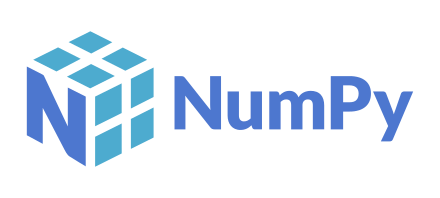

Пакет `numpy` предоставляет $n$-мерные однородные массивы (все элементы одного типа); в них нельзя вставить или удалить элемент в произвольном месте. В `numpy` реализовано много операций над массивами в целом. Если задачу можно решить, произведя некоторую последовательность операций над массивами, то это будет столь же эффективно, как в `C` или `matlab` — львиная доля времени тратится в библиотечных функциях, написанных на `C`.


## 1. Одномерные массивы

#### 1.1 Типы массивов, атрибуты

Можно преобразовать список в массив.

In [2]:
a = np.array([0, 2, 1])
a, type(a)

(array([0, 2, 1]), numpy.ndarray)

`print` печатает массивы в удобной форме.

In [3]:
print(a)

[0 2 1]


Класс `ndarray` имеет много методов.

In [4]:
set(dir(a)) - set(dir(object))

{'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delitem__',
 '__divmod__',
 '__float__',
 '__floordiv__',
 '__getitem__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__len__',
 '__lshift__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__neg__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setitem__',
 '__setstate__',
 '__sub__',


Наш массив одномерный.

In [5]:
a.ndim

1

В $n$-мерном случае возвращается кортеж размеров по каждой координате.

In [6]:
a.shape

(3,)

`size` — это полное число элементов в массиве; `len` — размер по первой координате (в 1-мерном случае это то же самое).

In [7]:
len(a), a.size

(3, 3)

`numpy` предоставляет несколько типов для целых (`int16`, `int32`, `int64`) и чисел с плавающей точкой (`float32`, `float64`).

In [8]:
a.dtype, a.dtype.name, a.itemsize

(dtype('int64'), 'int64', 8)

Массив чисел с плавающей точкой.

In [9]:
b = np.array([0., 2, 1])
b.dtype

dtype('float64')

Точно такой же массив.

In [10]:
c = np.array([0, 2, 1], dtype=np.float64)
print(c)

[0. 2. 1.]


Преобразование данных

In [11]:
print(c.dtype)
print(c.astype(int))
print(c.astype(str))

float64
[0 2 1]
['0.0' '2.0' '1.0']


#### 1.2 Индексация

Индексировать массив можно обычным образом.

In [12]:
a[1]

2

Массивы — изменяемые объекты.

In [13]:
a[1] = 3
print(a)

[0 3 1]


Массивы, разумеется, можно использовать в `for` циклах. Но при этом теряется главное преимущество `numpy` — быстродействие. Всегда, когда это возможно, лучше использовать операции над массивами как едиными целыми.

In [14]:
for i in a:
    print(i)

0
3
1


**Упражнение:** создайте numpy-массив, состоящий из первых пяти простых чисел, выведите его тип и размер.

**Решение:**

In [15]:
arr = np.array([2, 3, 5, 7, 11])
print(arr)
print(arr.shape)
print(arr.dtype)

[ 2  3  5  7 11]
(5,)
int64


Довольно часто встречается задача фильтрации массива (или как еще говорят создания `маски массива`). Поэтому рассмотрим пример с маской.

Пусть дан массив Numpy, и мы хотим удалить из него отрицательные значения.

In [16]:
a = np.array([5, 7, -3, 4, 2, -4])

Для того чтобы создать фильтр массива достаточно указать критерий отбора. На выходе мы получим массив из логических значений True и False, в котором нежелательные значения будут помечены как False.

In [17]:
a > 0

array([ True,  True, False,  True,  True, False])

In [18]:
a[a > 0]

array([5, 7, 4, 2])

Кроме того, отфильтрованные значения можно заполнить, например, нулями.

In [19]:
a[a < 0] = 0
a

array([5, 7, 0, 4, 2, 0])

#### 1.3 Создание массивов

Массивы, заполненные нулями или единицами. Часто лучше сначала создать такой массив, а потом присваивать значения его элементам.

In [20]:
a = np.zeros(3)
b = np.ones(3, dtype=np.int64)
c = np.full((3, 3), 5, dtype = int)
print(a)
print(b)
print(c)

[0. 0. 0.]
[1 1 1]
[[5 5 5]
 [5 5 5]
 [5 5 5]]


Если нужно создать массив, заполненный нулями, длины и типа другого массива, то можно использовать конструкцию

In [21]:
np.zeros_like(b)

array([0, 0, 0])

Функция `arange` подобна `range`. Аргументы могут быть с плавающей точкой. Следует избегать ситуаций, когда *(конец-начало)/шаг* — целое число, потому что в этом случае включение последнего элемента зависит от ошибок округления. Лучше, чтобы конец диапазона был где-то посредине шага.

In [22]:
a = np.arange(0, 9, 2)
print(a)

[0 2 4 6 8]


In [23]:
b = np.arange(0., 9, 2)
print(b)

[0. 2. 4. 6. 8.]


Последовательности чисел с постоянным шагом можно также создавать функцией `linspace`. Начало и конец диапазона включаются; последний аргумент — число точек.

In [24]:
a = np.linspace(0, 8, 5)
print(a)

[0. 2. 4. 6. 8.]


Функция `np.random.random()`.

Данная функция создает массив указанной формы и заполняет его случайными числами с плавающей точкой из непрерывного равномерного распределения в интервале [0, 1).

In [25]:
np.random.random(5)

array([0.58748789, 0.15412421, 0.38626907, 0.63819212, 0.24204921])

Получить значения из интервала [-10, 7) можно следующим образом:

In [26]:
(7 - (-10)) * np.random.random((5, 5)) - 10

array([[-0.47234907, -0.56408655, -6.59297716, -0.53912027, -6.44575578],
       [-7.69606568, -0.69767896, -4.45299145, -0.0114709 , -7.40739129],
       [ 6.26038194,  2.99676978,  4.07686008, -5.88453811,  5.97626885],
       [-2.16405667, -8.20971631, -2.00891086,  0.69906644, -8.07137645],
       [-5.29472676, -9.67574588, -5.21191766,  0.70977685,  2.35969228]])

Функция `np.random.choice`.

Генерирует случайную выборку из заданного одномерного массива

In [27]:
np.random.choice(10, 4)

array([2, 2, 0, 9])

В параметре p можно задать вероятность появления каждого элемента в выборке:

In [28]:
perm = [0, 0, 0.1, 0.1, 0.3, 0.3, 0.1, 0.1, 0, 0]
np.random.choice(10, 4, p = perm)

array([2, 5, 2, 5])

Параметр replace позволяет указать какими должны быть элементы выборки, False - все уникальные, True - элементы могут повторяться.

In [29]:
np.random.choice(10, 7, replace = True)

array([4, 0, 6, 0, 1, 1, 7])

In [30]:
a = ['spam', 'foo', 'bar']
np.random.choice(a, 2)

array(['spam', 'foo'], dtype='<U4')

**Упражнение:** создайте и выведите последовательность чисел от 10 до 20 с постоянным шагом, длина последовательности - 21.

**Решение:**

In [31]:
arr = np.linspace(10, 20, 21)
print(arr)

[10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5
 17.  17.5 18.  18.5 19.  19.5 20. ]


Последовательность чисел с постоянным шагом по логарифмической шкале от $10^0$ до $10^1$.

In [32]:
b = np.logspace(0, 1, 5)
print(b)

[ 1.          1.77827941  3.16227766  5.62341325 10.        ]


## 2. Операции над одномерными массивами

#### 2.1 Математические операции

Арифметические операции проводятся поэлементно.

In [33]:
a = np.array([0, 2, 1])

In [34]:
b = np.array([3, 2, 5])

In [35]:
print(a + b)

[3 4 6]


In [36]:
print(a - b)

[-3  0 -4]


In [37]:
print(a * b)

[0 4 5]


In [38]:
print(a / b)

[0.  1.  0.2]


In [39]:
print(a ** 2)

[0 4 1]


Библиотека `numpy` содержит элементарные функции, которые тоже применяются к массивам поэлементно. Они называются универсальными функциями (`ufunc`).

In [40]:
np.sin, type(np.sin)

(<ufunc 'sin'>, numpy.ufunc)

In [41]:
print(np.sin(a))

[0.         0.90929743 0.84147098]


Один из операндов может быть скаляром, а не массивом.

In [42]:
print(a + 1)

[1 3 2]


In [43]:
print(2 * a)

[0 4 2]


Сравнения дают булевы массивы.

In [44]:
print(a > b)

[False False False]


In [45]:
print(a == b)

[False  True False]


In [46]:
c = a > 5
print(c)

[False False False]


Кванторы "существует" и "для всех".

In [47]:
np.any(c), np.all(c)

(False, False)

Модификация на месте.

In [48]:
a

array([0, 2, 1])

In [49]:
a += 1
print(a)

[1 3 2]


In [50]:
b

array([3, 2, 5])

In [51]:
b *= 2
print(b)

[ 6  4 10]


При выполнении операций над массивами деление на 0 не возбуждает исключения, а даёт значения `np.nan` или `np.inf`.

In [52]:
print(np.array([0.0, 0.0, 1.0, -1.0]) / np.array([1.0, 0.0, 0.0, 0.0]))

[  0.  nan  inf -inf]


<ipython-input-52-c5e47bb236cc>:1: RuntimeWarning: divide by zero encountered in true_divide
  print(np.array([0.0, 0.0, 1.0, -1.0]) / np.array([1.0, 0.0, 0.0, 0.0]))
<ipython-input-52-c5e47bb236cc>:1: RuntimeWarning: invalid value encountered in true_divide
  print(np.array([0.0, 0.0, 1.0, -1.0]) / np.array([1.0, 0.0, 0.0, 0.0]))


In [53]:
np.nan + 1, np.inf + 1, np.inf * 0, 1. / np.inf

(nan, inf, nan, 0.0)

Сумма и произведение всех элементов массива; максимальный и минимальный элемент; среднее и среднеквадратичное отклонение.

In [54]:
b

array([ 6,  4, 10])

In [55]:
b.sum(), b.prod(), b.max(), b.min(), b.mean(), b.std()

(20, 240, 10, 4, 6.666666666666667, 2.494438257849294)

Имеются встроенные функции

In [56]:
print(np.sqrt(b))
print(np.exp(b))
print(np.log(b))
print(np.sin(b))
print(np.e, np.pi)

[2.44948974 2.         3.16227766]
[  403.42879349    54.59815003 22026.46579481]
[1.79175947 1.38629436 2.30258509]
[-0.2794155  -0.7568025  -0.54402111]
2.718281828459045 3.141592653589793


Иногда бывает нужно использовать частичные (кумулятивные) суммы. В наших курсах такое может пригодится.

In [57]:
print(b.cumsum())

[ 6 10 20]


#### 2.2 Сортировка, изменение массивов

Функция `sort` возвращает отсортированную копию, метод `sort` сортирует на месте.

In [58]:
b

array([ 6,  4, 10])

In [59]:
print(np.sort(b))
print(b)

[ 4  6 10]
[ 6  4 10]


In [60]:
b.sort()
print(b)

[ 4  6 10]


Объединение массивов.

In [61]:
a

array([1, 3, 2])

In [62]:
b

array([ 4,  6, 10])

In [63]:
a = np.hstack((a, b))
print(a)

[ 1  3  2  4  6 10]


Расщепление массива в позициях 3 и 6.

In [64]:
np.hsplit(a, [3, 6])

[array([1, 3, 2]), array([ 4,  6, 10]), array([], dtype=int64)]

Функции `delete`, `insert` и `append` не меняют массив на месте, а возвращают новый массив, в котором удалены, вставлены в середину или добавлены в конец какие-то элементы.

In [65]:
a = np.delete(a, 5)
print(a)

[1 3 2 4 6]


In [66]:
a = np.insert(a, 2, [0, 0])
print(a)

[1 3 0 0 2 4 6]


In [67]:
a = np.append(a, [1, 2, 3])
print(a)

[1 3 0 0 2 4 6 1 2 3]


#### 2.3 Способы индексации массивов

Есть несколько способов индексации массива. Вот обычный индекс.

In [68]:
a = np.linspace(0, 1, 11)
print(a)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [69]:
b = a[2]
print(b)

0.2


Диапазон индексов. Создаётся новый заголовок массива, указывающий на те же данные. Изменения, сделанные через такой массив, видны и в исходном массиве.

In [70]:
b = a[2:6]
print(b)

[0.2 0.3 0.4 0.5]


In [71]:
b[0] = -0.2
print(b)

[-0.2  0.3  0.4  0.5]


In [72]:
print(a)

[ 0.   0.1 -0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


Диапазон с шагом 2.

In [73]:
b = a[1:10:2]
print(b)

[0.1 0.3 0.5 0.7 0.9]


In [74]:
b[0] = -0.1
print(a)

[ 0.  -0.1 -0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


Массив в обратном порядке.

In [75]:
b = a[::-1]
print(b)

[ 1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3 -0.2 -0.1  0. ]


Подмассиву можно присвоить значение — массив правильного размера или скаляр.

In [76]:
a[1:10:3] = 0
print(a)

[ 0.   0.  -0.2  0.3  0.   0.5  0.6  0.   0.8  0.9  1. ]


Тут опять создаётся только новый заголовок, указывающий на те же данные.

In [77]:
b = a[:]
b[1] = 0.1
print(a)

[ 0.   0.1 -0.2  0.3  0.   0.5  0.6  0.   0.8  0.9  1. ]


Чтобы скопировать и данные массива, нужно использовать метод `copy`.

In [78]:
b = a.copy()
b[2] = 0
print(b)
print(a)

[0.  0.1 0.  0.3 0.  0.5 0.6 0.  0.8 0.9 1. ]
[ 0.   0.1 -0.2  0.3  0.   0.5  0.6  0.   0.8  0.9  1. ]


Можно задать список индексов.

In [79]:
print(a[[2, 3, 5]])

[-0.2  0.3  0.5]


Можно задать булев массив той же величины.

In [80]:
b = a > 0
print(b)

[False  True False  True False  True  True False  True  True  True]


In [81]:
print(a[b])

[0.1 0.3 0.5 0.6 0.8 0.9 1. ]


In [82]:
a

array([ 0. ,  0.1, -0.2,  0.3,  0. ,  0.5,  0.6,  0. ,  0.8,  0.9,  1. ])

In [83]:
b

array([False,  True, False,  True, False,  True,  True, False,  True,
        True,  True])

**Упражнение:**  
1). Создайте массив чисел от $-2\pi$  до $2\pi$.

2). Посчитайте сумму поэлементных квадратов синуса и косинуса для данного массива.

3). С помощью `np.all` проверьте, что в ответе только единицы.

**Решение:**

In [84]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 20)
np.all((np.sin(x)**2 + np.cos(x)**2).round() == 1)

True

**Задание:** Мы увидели, как копировать одномерные массивы. Теперь подумаем над следующей задачей с двумерными массивами. Найдите разницу между `arr[i1:i2, :][:, j1:j2] = 5` и `arr[i1:i2, j1:j2] = 5`.

Ответ: Разница в том, что в первом случае после первого обращения по индексу произойдет копирование, из-за чего результат не запишется в ожидаемое место.

## 3. Двумерные массивы

#### 3.1 Создание, простые операции

In [85]:
a = np.array([[0.0, 1.0], [-1.0, 0.0]])
print(a)

[[ 0.  1.]
 [-1.  0.]]


In [86]:
a.ndim

2

In [87]:
a.shape

(2, 2)

In [88]:
len(a), a.size

(2, 4)

In [89]:
a[1, 0]

-1.0

Атрибуту `shape` можно присвоить новое значение — кортеж размеров по всем координатам. Получится новый заголовок массива; его данные не изменятся.

In [90]:
b = np.linspace(0, 3, 4)
print(b)

[0. 1. 2. 3.]


In [91]:
b.shape

(4,)

In [92]:
b.shape = 2, 2
print(b)

[[0. 1.]
 [2. 3.]]


Можно растянуть в одномерный массив

In [93]:
print(b.ravel())

[0. 1. 2. 3.]


Арифметические операции поэлементные

In [94]:
print(a + 1)
print(a * 2)
print(a + [0, 1])  # второе слагаемое дополняется до матрицы копированием строк
print(a + np.array([[0, 2]]).T)  # .T - транспонирование
print(a + b)

[[1. 2.]
 [0. 1.]]
[[ 0.  2.]
 [-2.  0.]]
[[ 0.  2.]
 [-1.  1.]]
[[0. 1.]
 [1. 2.]]
[[0. 2.]
 [1. 3.]]


#### 3.2 Работа с матрицами

Поэлементное и матричное (только в Python >=3.5) умножение.

In [95]:
print(a * b)

[[ 0.  1.]
 [-2.  0.]]


In [96]:
print(a @ b)

[[ 2.  3.]
 [ 0. -1.]]


In [97]:
print(b @ a)

[[-1.  0.]
 [-3.  2.]]


**Упражнение:** создайте матрицы $\begin{pmatrix} -3 & 4 \\ 4 & 3 \end{pmatrix}$ и $\begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}$. Посчитайте их поэлементное и матричное произведения.

**Решение:**

In [98]:
a = np.array([[-3, 4], [4, 3]])
b = np.array([[2, 1], [1, 2]])
print(a * b)
print(b * a)
print(a @ b)
print(b @ a)

[[-6  4]
 [ 4  6]]
[[-6  4]
 [ 4  6]]
[[-2  5]
 [11 10]]
[[-2 11]
 [ 5 10]]


Умножение матрицы на вектор.

In [99]:
v = np.array([1, -1], dtype=np.float64)
print(b @ v)

[ 1. -1.]


In [100]:
print(v @ b)

[ 1. -1.]


Если у вас Питон более ранней версии, то для работы с матрицами можно использовать класс `np.matrix`, в котором операция умножения реализуется как матричное умножение.

In [101]:
np.matrix(a) * np.matrix(b)

matrix([[-2,  5],
        [11, 10]])

Внешнее произведение $a_{ij}=u_i v_j$

In [102]:
u = np.linspace(1, 2, 2)
v = np.linspace(2, 4, 3)
print(u)
print(v)

[1. 2.]
[2. 3. 4.]


In [103]:
a = np.outer(u, v)
print(a)

[[2. 3. 4.]
 [4. 6. 8.]]


Двумерные массивы, зависящие только от одного индекса: $x_{ij}=u_j$, $y_{ij}=v_i$

In [104]:
x, y = np.meshgrid(u, v)
print(x)
print(y)

[[1. 2.]
 [1. 2.]
 [1. 2.]]
[[2. 2.]
 [3. 3.]
 [4. 4.]]


Единичная матрица.

In [105]:
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Метод `reshape` делает то же самое, что присваивание атрибуту `shape`.

In [106]:
print(I.reshape(16))

[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]


In [107]:
print(I.reshape(2, 8))

[[1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1.]]


Строка.

In [108]:
print(I[1])

[0. 1. 0. 0.]


Цикл по строкам.

In [109]:
for row in I:
    print(row)

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]


Столбец.

In [110]:
print(I[:, 2])

[0. 0. 1. 0.]


Подматрица.

In [111]:
print(I[0:2, 1:3])

[[0. 0.]
 [1. 0.]]


Можно построить двумерный массив из функции.

In [112]:
def f(i, j):
    print(i)
    print(j)
    return 10 * i + j

print(np.fromfunction(f, (4, 4), dtype=np.int64))

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]]


Транспонированная матрица.

In [113]:
print(b.T)

[[2 1]
 [1 2]]


Соединение матриц по горизонтали и по вертикали.

In [114]:
a = np.array([[0, 1], [2, 3]])
b = np.array([[4, 5, 6], [7, 8, 9]])
c = np.array([[4, 5], [6, 7], [8, 9]])
print(a)
print(b)
print(c)

[[0 1]
 [2 3]]
[[4 5 6]
 [7 8 9]]
[[4 5]
 [6 7]
 [8 9]]


In [115]:
print(np.hstack((a, b)))

[[0 1 4 5 6]
 [2 3 7 8 9]]


In [116]:
print(np.vstack((a, c)))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


Сумма всех элементов; суммы столбцов; суммы строк.

In [117]:
b

array([[4, 5, 6],
       [7, 8, 9]])

In [118]:
print(b.sum())
print(b.sum(axis=0))
print(b.sum(axis=1))

39
[11 13 15]
[15 24]


Аналогично работают `prod`, `max`, `min` и т.д.

In [119]:
print(b.max())
print(b.max(axis=0))
print(b.min(axis=1))

9
[7 8 9]
[4 7]


След - сумма диагональных элементов.

In [120]:
np.trace(a)

3

**Упражнение:** 

в статистике и машинном обучении часто приходится иметь с функцией $RSS$, которая вычисляется по формуле $\sum_{i=1}^{n} (y_i - a_i)^2$, где $y_i$ — координаты одномерного вектора $y$,  $a_i$ — координаты одномерного вектора $a$. Посчитайте $RSS$ для $y = (1, 2, 3, 4, 5), a = (3, 2, 1, 0, -1)$.

**Решение:**

In [121]:
# решение
y = np.arange(1, 6)
a = np.arange(3, -2, -1)
rss = np.sum((y - a)**2)

## 4. Тензоры (многомерные массивы)

#### 4.1 Создание, простые операции

In [122]:
X = np.arange(24).reshape(2, 3, 4)
print(X)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


Суммирование (аналогично остальные операции)

In [123]:
# суммируем только по нулевой оси, то есть для фиксированных j и k 
# суммируем только элементы с индексами (*, j, k)
print(X.sum(axis=0))

[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]


In [124]:
# суммируем сразу по двум осям, то есть для фиксированной i 
# суммируем только элементы с индексами (i, *, *)
print(X.sum(axis=(1, 2)))

[ 66 210]


#### 4.2. Broadcasting

Выше при арифметических операциях с массивами, например, при сложении и умножении, мы перемножали массивы одинаковой формы. В самом простом случае операндами были одномерные массивы одинаковой длины.

In [125]:
# Самый простой случай
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
print(a * b)

[2 4 6]


Произошло поэлементное умножение, все элементы массива $a$ умножились на $2$. Но мы знаем, что это можно сделать проще, просто умножив массив на $2$.

In [126]:
# Умножение массива на число
print(a * 2)

[2 4 6]


На самом деле поведение будет аналогичным, если умножить одномерный массив на массив длины $1$.

In [127]:
# Умножение массивов разных длин
print(a * [2])

[2 4 6]


В этом случае работает так называемый *broadcasting*. Один массив "растягивается", чтобы повторить форму другого.

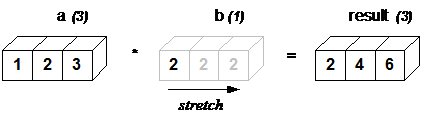

Такой же эффект работает и для многомерных массивов. Если по какому-то измерению размер у одного массива равен $1$, а у другого — произвольный, то по этому измерению может произойти "рястяжение". Таким образом, массивы можно умножать друг на друга, если в измерениях, где они по размеру не совпадают, хотя бы у одного размер $1$. Для других поэлементных операций правило аналогично.

Важно отметить, что размерности сопоставляются справа налево. Если их количество не совпадает, что массивы меньшей размерности сначала дополняются слева размерностями 1. Например, при сложении массива размера $4 \times 3$ с массивом размера $3$ последний сначала преобразуется в массив размера $1 \times 3$.

In [128]:

a = np.array([[ 0,  0,  0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([0, 1, 2])

print(a + b)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


Схематично проведенную операцию можно визуализировать следующим образом.

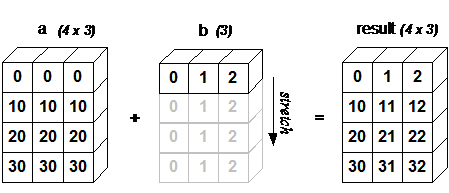


Если неединичные размерности справа не будут совпадать, то выполнить операцию уже не получится. Например, как приведено на схеме ниже. 

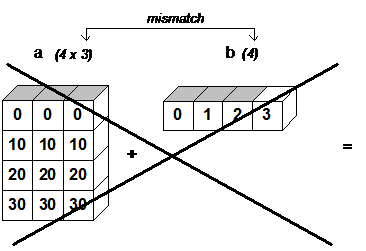


А если размеры будут не совместимы, то произойдет ошибка.

In [129]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

Если массивы имеют несовместимый размер, можно их сначала привести к одной форме

In [130]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a.reshape((-1, 1)) + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

**Упражнение:**

Подумайте, массив какого размера получится, если перемножить массив $4 \times 1 \times 3$ и массив $12 \times 1$. Убедитесь на практике в правильности вашего ответа.

In [131]:
# решение
a = np.ones((4, 1, 3))
b = np.ones((12, 1))

mul_shape = (a * b).shape
print(mul_shape)

(4, 12, 3)


*Замечание*

Знать про broadcasting нужно, но пользоваться им надо с осторожностью. Многократное копирование массива при растяжении может привести к неэффективной работе программы по памяти. Особенно за этим приходится следить при работе с GPU.

Часто при работе с массивами NumPy требуется добавлять новые оси измерений и удалять существующие. В NumPy добавлять новые оси иногда удобнее с помощью специального объекта `newaxis`. Например, пусть у нас есть одномерный массив:

In [132]:
a = np.array([1,2,3,4,5,6,7,8,9,10])

У него одна ось – одно измерение. Добавим еще одну ось, допустим, в начало. С помощью объекта np.newaxis это можно сделать так:

In [133]:
b = a[np.newaxis, :] # добавление оси axis0
b.shape

(1, 10)

Или, можно прописать сразу две оси:

In [134]:
c = a[np.newaxis, :, np.newaxis]
c.shape

(1, 10, 1)

Функция `concatenate()` соединяет массивы вдоль указанной оси.

In [135]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[0, 0]])
c = np.array([[0], [0], [0]])
a.shape, b.shape, c.shape

((3, 2), (1, 2), (3, 1))

In [136]:
np.concatenate([a, b])

array([[1, 2],
       [3, 4],
       [5, 6],
       [0, 0]])

In [137]:
np.concatenate([a, c], axis = 1)

array([[1, 2, 0],
       [3, 4, 0],
       [5, 6, 0]])

Функция `split()` разбивает массив на несколько подмассивов.

In [138]:
a = np.arange(10)
np.split(a, 5)

[array([0, 1]), array([2, 3]), array([4, 5]), array([6, 7]), array([8, 9])]

Функция `array_split()` тоже разбивает массив на несколько подмассивов. Единственное отличие данной функции от функции split заключается в снятии ограничений на параметр `indices_or_sections`. В функции `array_split` параметр indices_or_sections может быть равен числу, которое не делит нацело длинну указанной оси.

## 5. Линейная алгебра

In [139]:
a = np.array([[0, 1], [2, 3]])

In [140]:
np.linalg.det(a)

-2.0

Обратная матрица.

In [141]:
a1 = np.linalg.inv(a)
print(a1)

[[-1.5  0.5]
 [ 1.   0. ]]


In [142]:
print(a @ a1)
print(a1 @ a)

[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


Решение линейной системы $au=v$.

In [143]:
v = np.array([0, 1], dtype=np.float64)
print(a1 @ v)

[0.5 0. ]


In [144]:
u = np.linalg.solve(a, v)
print(u)

[0.5 0. ]


Проверим.

In [145]:
print(a @ u - v)

[0. 0.]


Собственные значения и собственные векторы: $a u_i = \lambda_i u_i$. `l` — одномерный массив собственных значений $\lambda_i$, столбцы матрицы $u$ — собственные векторы $u_i$.

In [146]:
l, u = np.linalg.eig(a)
print(l)

[-0.56155281  3.56155281]


In [147]:
print(u)

[[-0.87192821 -0.27032301]
 [ 0.48963374 -0.96276969]]


Проверим.

In [148]:
for i in range(2):
    print(a @ u[:, i] - l[i] * u[:, i])

[0.00000000e+00 1.66533454e-16]
[ 0.0000000e+00 -4.4408921e-16]


Функция `diag` от одномерного массива строит диагональную матрицу; от квадратной матрицы — возвращает одномерный массив её диагональных элементов.

In [149]:
L = np.diag(l)
print(L)
print(np.diag(L))

[[-0.56155281  0.        ]
 [ 0.          3.56155281]]
[-0.56155281  3.56155281]


Все уравнения $a u_i = \lambda_i u_i$ можно собрать в одно матричное уравнение $a u = u \Lambda$, где $\Lambda$ — диагональная матрица с собственными значениями $\lambda_i$ по диагонали.

In [150]:
print(a @ u - u @ L)

[[ 0.00000000e+00  0.00000000e+00]
 [ 1.66533454e-16 -4.44089210e-16]]


Поэтому $u^{-1} a u = \Lambda$.

In [151]:
print(np.linalg.inv(u) @ a @ u)

[[-5.61552813e-01  2.77555756e-17]
 [-2.22044605e-16  3.56155281e+00]]


Найдём теперь левые собственные векторы $v_i a = \lambda_i v_i$. Собственные значения $\lambda_i$ те же самые.

In [152]:
l, v = np.linalg.eig(a.T)
print(l)
print(v)

[-0.56155281  3.56155281]
[[-0.96276969 -0.48963374]
 [ 0.27032301 -0.87192821]]


Собственные векторы нормированы на 1.

In [153]:
print(u.T @ u)
print(v.T @ v)

[[ 1.         -0.23570226]
 [-0.23570226  1.        ]]
[[1.         0.23570226]
 [0.23570226 1.        ]]


Левые и правые собственные векторы, соответствующие разным собственным значениям, ортогональны, потому что $v_i a u_j = \lambda_i v_i u_j = \lambda_j v_i u_j$.

In [154]:
print(v.T @ u)

[[ 9.71825316e-01  0.00000000e+00]
 [-5.55111512e-17  9.71825316e-01]]


**Упражнение:** 

в машинном обучении есть модель линейной регрессии, для которой "хорошее" решение считается по следующей формуле: $\widehat{\theta} = (X^T \cdot X + \lambda \cdot I_n)^{-1}\cdot X^T y$. Вычислите $\widehat{\theta}$ для $ X = \begin{pmatrix} -3 & 4 & 1 \\ 4 & 3 & 1  \end{pmatrix}$, $y = \begin{pmatrix} 10 \\ 12  \end{pmatrix}$, $I_n$ — единичная матрица размерности 3, $\lambda = 0.1$.

**Решение:**

In [155]:
X = np.array([[-3, 4, 1], [4, 3, 1]])
y = np.array([10, 12])
I = np.eye(3)
lambd = 0.1
theta = np.linalg.inv(X.T @ X + lambd * I) @ X.T @ y

## 6. Интегрирование

In [156]:
from scipy.integrate import quad, odeint
from scipy.special import erf

In [157]:
def f(x):
    return np.exp(-x ** 2)

Адаптивное численное интегрирование (может быть до бесконечности). `err` — оценка ошибки.

In [158]:
res, err = quad(f, 0, np.inf)
print(np.sqrt(np.pi) / 2, res, err)

0.8862269254527579 0.8862269254527579 7.101318390472462e-09


In [159]:
res, err =  quad(f, 0, 1)
print(np.sqrt(np.pi) / 2 * erf(1), res, err)

0.7468241328124269 0.7468241328124271 8.291413475940725e-15


## 7. Сохранение в файл и чтение из файла

In [160]:
x = np.arange(0, 25, 0.5).reshape((5, 10))

# Сохраняем в файл example.txt данные x в формате с двумя точками после запятой и разделителем ';'
np.savetxt('example.txt', x, fmt='%.2f', delimiter=';')

Получится такой файл

In [161]:
! cat example.txt

0.00;0.50;1.00;1.50;2.00;2.50;3.00;3.50;4.00;4.50
5.00;5.50;6.00;6.50;7.00;7.50;8.00;8.50;9.00;9.50
10.00;10.50;11.00;11.50;12.00;12.50;13.00;13.50;14.00;14.50
15.00;15.50;16.00;16.50;17.00;17.50;18.00;18.50;19.00;19.50
20.00;20.50;21.00;21.50;22.00;22.50;23.00;23.50;24.00;24.50


Теперь его можно прочитать

In [162]:
x = np.loadtxt('example.txt', delimiter=';')
print(x)

[[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5]
 [ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5]
 [10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5]
 [15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5]
 [20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5]]


## 8. Производительность numpy

Посмотрим на простой пример — сумма первых $10^8$ чисел.

In [163]:
%%time

sum_value = 0
for i in range(10 ** 8):
    sum_value += i
print(sum_value)

4999999950000000
CPU times: user 10.5 s, sys: 0 ns, total: 10.5 s
Wall time: 10.6 s


Немного улучшеный код

In [164]:
%%time

sum_value = sum(range(10 ** 8))
print(sum_value)

4999999950000000
CPU times: user 1.61 s, sys: 0 ns, total: 1.61 s
Wall time: 1.6 s


Код с использованием функций библиотеки `numpy`

In [165]:
%%time

sum_value = np.arange(10 ** 8).sum()
print(sum_value)

4999999950000000
CPU times: user 266 ms, sys: 1.84 s, total: 2.11 s
Wall time: 8.04 s


Простой и понятный код работает в $30$ раз быстрее!

Посмотрим на другой пример. Сгенерируем матрицу размера $500\times1000$, и вычислим средний минимум по колонкам.

Простой код, но при этом даже использующий некоторые питон-функции

*Замечание*. Далее с помощью `scipy.stats` происходит генерация случайных чисел из равномерного распределения на отрезке $[0, 1]$. Этот модуль будем изучать в следующем ноутбуке.

In [166]:
import scipy.stats as sps

In [167]:
%%time

N, M = 500, 1000
matrix = []
for i in range(N):
    matrix.append([sps.uniform.rvs() for j in range(M)])

min_col = [min([matrix[i][j] for i in range(N)]) for j in range(M)]
mean_min = sum(min_col) / N
print(mean_min)

0.004160749803539531
CPU times: user 17.7 s, sys: 180 ms, total: 17.9 s
Wall time: 17.8 s


Понятный код с использованием функций библиотеки numpy

In [168]:
%%time

N, M = 500, 1000
matrix = sps.uniform.rvs(size=(N, M))
mean_min = matrix.min(axis=1).mean()
print(mean_min)

0.0010383116509533313
CPU times: user 18.7 ms, sys: 226 µs, total: 19 ms
Wall time: 24.1 ms


Простой и понятный код работает в 1500 раз быстрее!

## 9. Суммы Эйнштейна

С помощью соглашения Эйнштейна о суммировании, многие общие многомерные линейные алгебраические операции с массивами могут быть представлены простым способом.

`Если одна и та же буква в обозначении индекса встречается и сверху, и снизу, то такой член полагается просуммированным по всем значениям, которые может принимать этот индекс. `

Например, выражение $c_j = a_i b^i_j$ понимается как $c_j = \sum_{i=1}^n a_i b^i_j$.

Подобные операции часто возникают в анализе данных, в особенности при реализации байесовских методов.

В `numpy` такие операции реализует функция `einsum`, причем здесь не делается разницы между нижними и верхними индексами. Функция принимает на вход сигнатуру операции в виде текстовой строки и матрицы с данными.

Разберем на примере выше. В данном случае сигнатура имеет вид `i,ji->j`. Элементы сигнатуры последовательно означают следующее (тензор = многомерная матрица):
* `i`— объявление обозначений индексов тензора $A$. Поскольку индекс один, то тем самым $A$ должен быть вектором.
* `,` — переход к объявлению индексов следующему тензору.
* `ji` — объявление обозначений индексов тензора $B$. Поскольку индекса два, то тем самым $B$ должен быть матрицей.
* `->` — разграничение входа и выхода.
* `j` — индекс на выходе. Поскольку индекс $i$ объявлен на входе и не объявлен на выходе, по нему происходит суммирование поэлементных произведений.

In [169]:
A = np.array([0, 1, 2])
B = np.array([[10, 15, 20], [100, 150, 200]])
print(A)
print(B)

[0 1 2]
[[ 10  15  20]
 [100 150 200]]


В приведенном выше примере получаем:
* $c_0 = a_0 \cdot b^0_0 + a_1 \cdot b^1_0 + a_2 \cdot b^2_0$. В нашем случае: $c_0 = 0 \cdot 1 + 1 \cdot 15 + 2 \cdot 20$.
* $c_1 = a_0 \cdot b^0_1 + a_1 \cdot b^1_1 + a_2 \cdot b^2_1$. В нашем случае: $c_1 = 0 \cdot 1 + 1 \cdot 150 + 2 \cdot 200$.

In [170]:
np.einsum('i,ji->j', A, B)

array([ 55, 550])

Суммирование элементов вектора $A$

In [171]:
np.einsum('i->', A)

3

Суммирование элементов матрицы $B$ по столбцам

In [172]:
np.einsum('ji->i', B)

array([110, 165, 220])

Рассмотрим следующие матрицы

In [173]:
A = np.array([[0, 1, 2], [3, 4, 5]])
B = np.array([[0, 1], [10, 100], [30, 70]])
print(A)
print(B)

[[0 1 2]
 [3 4 5]]
[[  0   1]
 [ 10 100]
 [ 30  70]]


Транспонирование матрицы $A$

In [174]:
np.einsum('ij->ji', A) 

array([[0, 3],
       [1, 4],
       [2, 5]])

Матричное умножение

In [175]:
np.einsum('ij,jk->ik', A, B) 

array([[ 70, 240],
       [190, 753]])

Можно наоборот

In [176]:
np.einsum('jk,ij->ik', B, A) 

array([[ 70, 240],
       [190, 753]])

Квадратная матрица

In [177]:
C = np.arange(9).reshape((3, 3))
C

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Диагональ

In [178]:
np.einsum('ii->i', C)

array([0, 4, 8])

След

In [179]:
np.einsum('ii->', C)

12

Какая-то странная операция

In [180]:
np.einsum('ij,kj,jl->ilk', A, C, B) 

array([[[ 130,  340,  550],
        [ 380, 1100, 1820]],

       [[ 340,  910, 1480],
        [1100, 3359, 5618]]])

**Упражнение.** Создайте матрицы $A\in\mathbb{R}^{3\times2}, B\in\mathbb{R}^{2\times2}$. Посчитайте $\text{tr} (ABBA^T)$

In [181]:
A = np.array([[0, 1], [2, 3], [4, 5]])
B = np.array([[0, 1], [100, 30]])
print(A)
print(B)

[[0 1]
 [2 3]
 [4 5]]
[[  0   1]
 [100  30]]


Элемент квадратной матрицы $ABBA^T$ на позиции $(i, m)$ можно представить как
$$\sum_j\sum_k\sum_l a_{ij}b_{jk}b_{kl}a_{ml}.$$
 
Результат — сумма диагональных элементой этой матрицы, то есть 
$$ \text{tr} (ABBA^T) = \sum_i\sum_j\sum_k\sum_l a_{ij}b_{jk}b_{kl}a_{il}. $$

Причем результат является числом. Код операции в виде сумм Эйншейна:

In [182]:
np.einsum('ij,jk,kl,il->', A, B, B, A)

115780

Проверим

In [183]:
np.sum(np.diag(A @ B @ B @ A.T))

115780